In [ ]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')

Reducer
And                     Axes(0.125,0.11;0.775x0.77)
Or                      Axes(0.125,0.11;0.775x0.77)
allNonZero              Axes(0.125,0.11;0.775x0.77)
anyNonZero              Axes(0.125,0.11;0.775x0.77)
circularMean            Axes(0.125,0.11;0.775x0.77)
circularStddev          Axes(0.125,0.11;0.775x0.77)
circularVariance        Axes(0.125,0.11;0.775x0.77)
count                   Axes(0.125,0.11;0.775x0.77)
countDistinctNonNull    Axes(0.125,0.11;0.775x0.77)
countRuns               Axes(0.125,0.11;0.775x0.77)
firstNonNull            Axes(0.125,0.11;0.775x0.77)
kendallsCorrelation     Axes(0.125,0.11;0.775x0.77)
kurtosis                Axes(0.125,0.11;0.775x0.77)
lastNonNull             Axes(0.125,0.11;0.775x0.77)
max                     Axes(0.125,0.11;0.775x0.77)
mean                    Axes(0.125,0.11;0.775x0.77)
median                  Axes(0.125,0.11;0.775x0.77)
min                     Axes(0.125,0.11;0.775x0.77)
minMax                  Axes(0.125,0.11;0.775x0.77)
mode

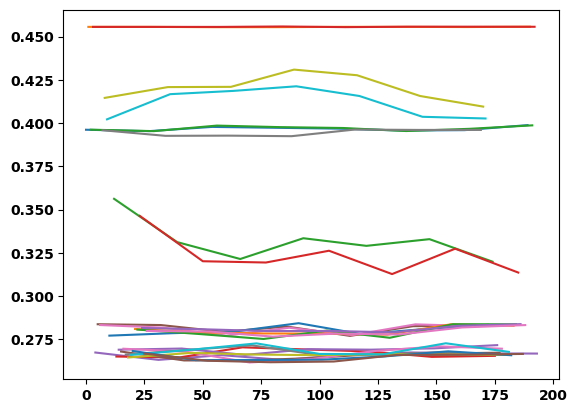

In [1]:
import pandas as pd

df = pd.read_csv("../reports/reducer_composites.csv")
df.groupby("Reducer")["Root Mean Squared Error"].plot()#.min()

In [5]:
df.groupby("Reducer")["Root Mean Squared Error"].min().sort_values()

Reducer
median                  0.261563
sum                     0.261700
mean                    0.262736
product                 0.262910
circularMean            0.262981
minMax                  0.264441
lastNonNull             0.264469
max                     0.265934
mode                    0.265938
min                     0.266040
sampleVariance          0.275147
variance                0.276506
circularStddev          0.276936
firstNonNull            0.277079
circularVariance        0.277089
sampleStdDev            0.277662
stdDev                  0.278993
skew                    0.312669
kurtosis                0.319831
count                   0.392386
And                     0.395300
allNonZero              0.395308
countRuns               0.402129
countDistinctNonNull    0.409483
Or                      0.455401
anyNonZero              0.455427
kendallsCorrelation          NaN
Name: Root Mean Squared Error, dtype: float64

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

from ltm.data import split_band_name
from ltm.features import load_raster, drop_nan_rows

X = load_raster("../data/processed/band_importance/X_sentinel.tif")
y = load_raster("../data/processed/y.tif")
columns = [
    "1 Mean B1",
    "1 Mean B2",
    "1 Mean B3",
    "1 Mean B4",
    "1 Mean B5",
    "1 Mean B6",
    "1 Mean B7",
    "1 Mean B8",
    "1 Mean B8A",
    "1 Mean B9",
    "1 Mean B11",
    "1 Mean B12",
]
X = X[columns]
X, y = drop_nan_rows(X, y)


scoring = {
    "Root Mean Squared Error": make_scorer(mean_squared_error, squared=False),
}

rf_reg = RandomForestRegressor(n_jobs=-1, random_state=42)
cv_results = cross_validate(rf_reg, X, y, cv=5, scoring=scoring, n_jobs=-1)
cv_results["test_Root Mean Squared Error"].mean()

0.3034714302491548